In [4]:
# Laibrabres
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
df=pd.read_csv(r"C:\Users\91882\Downloads\archive (4)\blogtext.csv")
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
df.text=df.text.astype('str')

In [5]:
df.shape

(681284, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
# Checking null values 
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

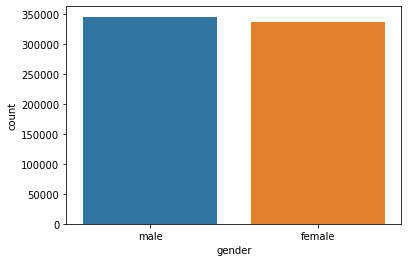

In [8]:
sns.countplot(df.gender)
# v

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


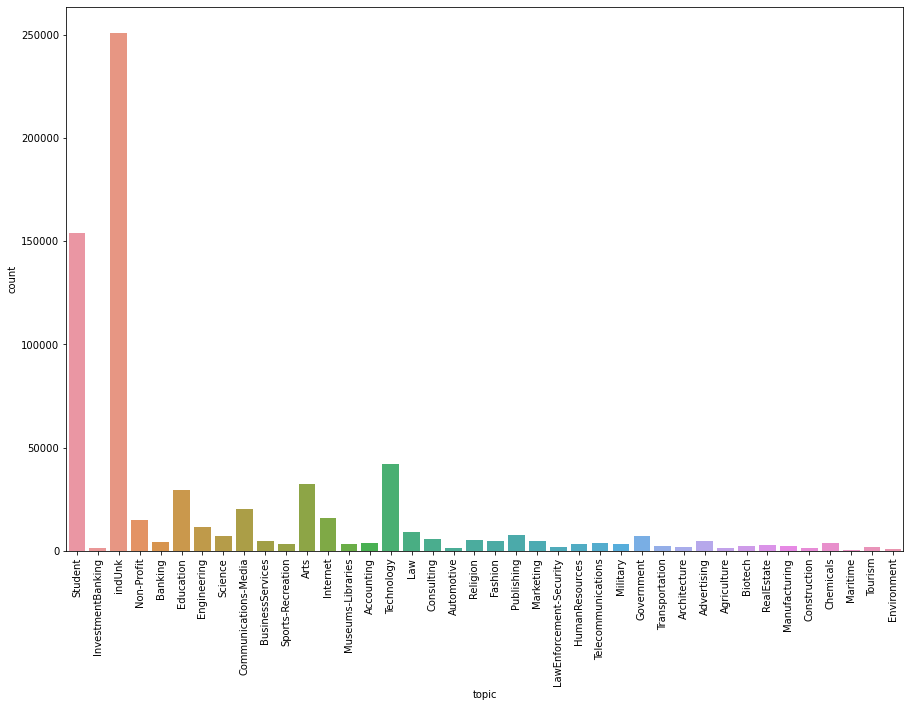

In [9]:
plt.rcParams['figure.figsize']=[15,10]
sns.countplot(df.topic)
plt.xticks(rotation=90)
plt.show()

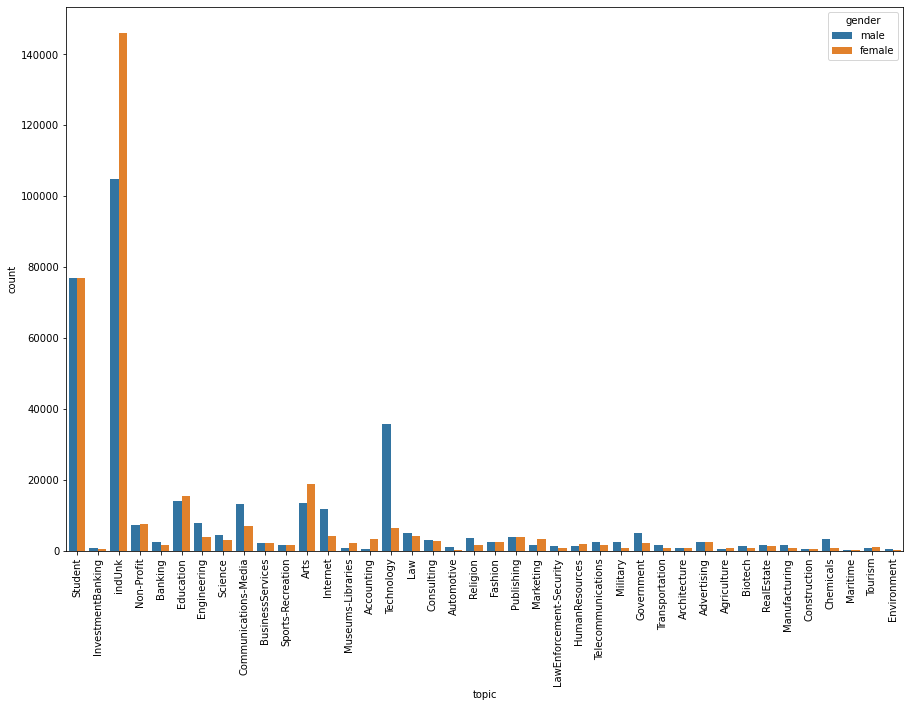

In [10]:
sns.countplot(x=df.topic,hue=df.gender)
plt.xticks(rotation=90)
plt.show()
# as wee cans see most of the reader are females as comparitively males

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sign', ylabel='count'>

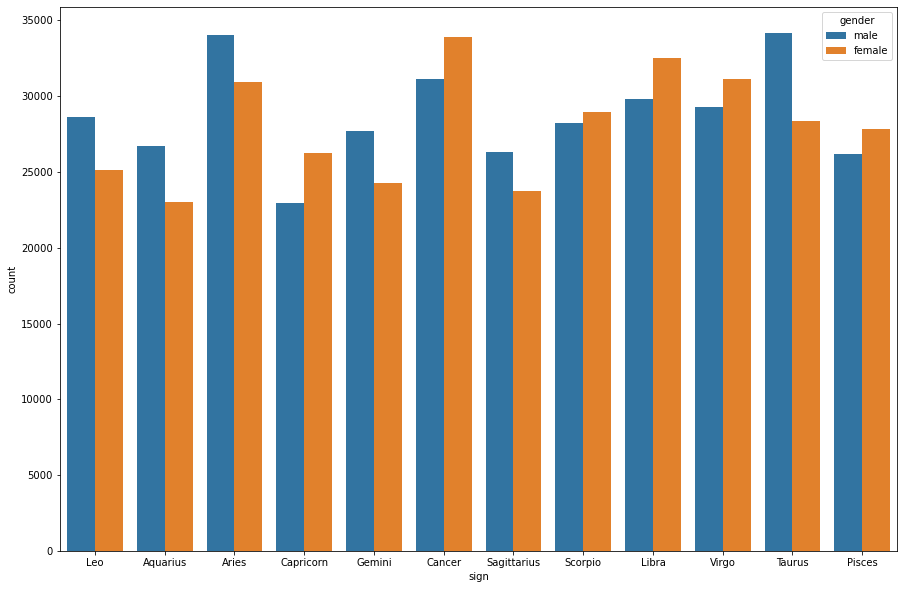

In [11]:
sns.countplot(df.sign,hue=df.gender)

In [7]:
# as given that age should be bucket into 3 class 10s" blogs (ages 13-17), "20s" blogs(ages 23-27), "30s" blogs (ages 33-47)
df.age.replace(np.arange(13,18),'10s blogs',inplace=True)
df.age.replace(np.arange(23,28),'20s blogs',inplace=True)
df.age.replace(np.arange(33,49),'30s blogs',inplace=True)

In [13]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,10s blogs,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,10s blogs,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,10s blogs,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,10s blogs,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,30s blogs,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,20s blogs,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,20s blogs,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,20s blogs,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,20s blogs,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [14]:
df.age.value_counts()

20s blogs    321447
10s blogs    235867
30s blogs    123970
Name: age, dtype: int64

In [8]:
# as the data set is too large to perform the modeling i am taking a subset of the data randomaly of each group so that 
# our will be balance on the basis of age group
samp=df.groupby('age').sample(n=32000,random_state=10)
samp.reset_index(drop=True,inplace=True)
samp

,id,gender,age,topic,sign,date,text
0,4302827,female,10s blogs,Student,Libra,"21,August,2004",I get the feeling Bailey isn't complete...
1,3610960,female,10s blogs,Student,Aries,"27,June,2004",I dunno but I was thinkin...movie...
2,1103575,female,10s blogs,indUnk,Scorpio,"13,June,2004",urlLink This is the Dr. Seuss tree ...
3,2560767,male,10s blogs,indUnk,Virgo,"19,May,2004","sup lax is over, school is ..."
4,3403444,female,10s blogs,indUnk,Taurus,"23,June,2004",COOLGAL805: jen is a lesbian! Jumper991...
...,...,...,...,...,...,...,...
95995,1379288,female,30s blogs,HumanResources,Aries,"10,May,2004","After speaking to the courts,..."
95996,303162,female,30s blogs,indUnk,Virgo,"30,May,2004",Looking for new blogs? Check out urlLi...
95997,595404,female,30s blogs,indUnk,Pisces,"10,March,2004","ok, so mm feels badly about the trouble..."
95998,831241,female,30s blogs,indUnk,Cancer,"02,June,2004",OEF &#151; Air Force Tech. Sg...


In [9]:
# here we are dropping insignificant features for this model as id  and date is not contributing to know more about author 
# so we drop these features
samp.drop(['id','date'],axis=1,inplace=True)
samp

,gender,age,topic,sign,text
0,female,10s blogs,Student,Libra,I get the feeling Bailey isn't complete...
1,female,10s blogs,Student,Aries,I dunno but I was thinkin...movie...
2,female,10s blogs,indUnk,Scorpio,urlLink This is the Dr. Seuss tree ...
3,male,10s blogs,indUnk,Virgo,"sup lax is over, school is ..."
4,female,10s blogs,indUnk,Taurus,COOLGAL805: jen is a lesbian! Jumper991...
...,...,...,...,...,...
95995,female,30s blogs,HumanResources,Aries,"After speaking to the courts,..."
95996,female,30s blogs,indUnk,Virgo,Looking for new blogs? Check out urlLi...
95997,female,30s blogs,indUnk,Pisces,"ok, so mm feels badly about the trouble..."
95998,female,30s blogs,indUnk,Cancer,OEF &#151; Air Force Tech. Sg...


In [17]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  96000 non-null  object
 1   age     96000 non-null  object
 2   topic   96000 non-null  object
 3   sign    96000 non-null  object
 4   text    96000 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [10]:
# Here we are merging the table gender,age,topic and sign as a single attribute known as label
samp["labels"] = samp.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [11]:
samp

,gender,age,topic,sign,text,labels
0,female,10s blogs,Student,Libra,I get the feeling Bailey isn't complete...,"[female, 10s blogs, Student, Libra]"
1,female,10s blogs,Student,Aries,I dunno but I was thinkin...movie...,"[female, 10s blogs, Student, Aries]"
2,female,10s blogs,indUnk,Scorpio,urlLink This is the Dr. Seuss tree ...,"[female, 10s blogs, indUnk, Scorpio]"
3,male,10s blogs,indUnk,Virgo,"sup lax is over, school is ...","[male, 10s blogs, indUnk, Virgo]"
4,female,10s blogs,indUnk,Taurus,COOLGAL805: jen is a lesbian! Jumper991...,"[female, 10s blogs, indUnk, Taurus]"
...,...,...,...,...,...,...
95995,female,30s blogs,HumanResources,Aries,"After speaking to the courts,...","[female, 30s blogs, HumanResources, Aries]"
95996,female,30s blogs,indUnk,Virgo,Looking for new blogs? Check out urlLi...,"[female, 30s blogs, indUnk, Virgo]"
95997,female,30s blogs,indUnk,Pisces,"ok, so mm feels badly about the trouble...","[female, 30s blogs, indUnk, Pisces]"
95998,female,30s blogs,indUnk,Cancer,OEF &#151; Air Force Tech. Sg...,"[female, 30s blogs, indUnk, Cancer]"


In [12]:
samp.drop(['gender','age','topic','sign'],axis=1,inplace=True)

In [13]:
samp

,text,labels
0,I get the feeling Bailey isn't complete...,"[female, 10s blogs, Student, Libra]"
1,I dunno but I was thinkin...movie...,"[female, 10s blogs, Student, Aries]"
2,urlLink This is the Dr. Seuss tree ...,"[female, 10s blogs, indUnk, Scorpio]"
3,"sup lax is over, school is ...","[male, 10s blogs, indUnk, Virgo]"
4,COOLGAL805: jen is a lesbian! Jumper991...,"[female, 10s blogs, indUnk, Taurus]"
...,...,...
95995,"After speaking to the courts,...","[female, 30s blogs, HumanResources, Aries]"
95996,Looking for new blogs? Check out urlLi...,"[female, 30s blogs, indUnk, Virgo]"
95997,"ok, so mm feels badly about the trouble...","[female, 30s blogs, indUnk, Pisces]"
95998,OEF &#151; Air Force Tech. Sg...,"[female, 30s blogs, indUnk, Cancer]"


In [22]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    96000 non-null  object
 1   labels  96000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [14]:
# here converting text into lower words
samp['text']=samp['text'].str.lower()

In [24]:
samp

,text,labels
0,i get the feeling bailey isn't complete...,"[female, 10s blogs, Student, Libra]"
1,i dunno but i was thinkin...movie...,"[female, 10s blogs, Student, Aries]"
2,urllink this is the dr. seuss tree ...,"[female, 10s blogs, indUnk, Scorpio]"
3,"sup lax is over, school is ...","[male, 10s blogs, indUnk, Virgo]"
4,coolgal805: jen is a lesbian! jumper991...,"[female, 10s blogs, indUnk, Taurus]"
...,...,...
95995,"after speaking to the courts,...","[female, 30s blogs, HumanResources, Aries]"
95996,looking for new blogs? check out urlli...,"[female, 30s blogs, indUnk, Virgo]"
95997,"ok, so mm feels badly about the trouble...","[female, 30s blogs, indUnk, Pisces]"
95998,oef &#151; air force tech. sg...,"[female, 30s blogs, indUnk, Cancer]"


In [2]:
import string
 
test_str = 'Gfg, is best: for ! Geeks ;'
 
test_str = test_str.translate(str.maketrans('', '', string.punctuation))
print(test_str)

Gfg is best for  Geeks 


In [25]:
# removing unwanted punctuation
import string
string.punctuation
samp['text'] = samp['text'].str.translate(str.maketrans('', '', string.punctuation))
samp


,text,labels
0,i get the feeling bailey isnt completel...,"[female, 10s blogs, Student, Libra]"
1,i dunno but i was thinkinmovies o...,"[female, 10s blogs, Student, Aries]"
2,urllink this is the dr seuss tree w...,"[female, 10s blogs, indUnk, Scorpio]"
3,sup lax is over school is w...,"[male, 10s blogs, indUnk, Virgo]"
4,coolgal805 jen is a lesbian jumper991 i...,"[female, 10s blogs, indUnk, Taurus]"
...,...,...
95995,after speaking to the courts ...,"[female, 30s blogs, HumanResources, Aries]"
95996,looking for new blogs check out urllin...,"[female, 30s blogs, indUnk, Virgo]"
95997,ok so mm feels badly about the troubles...,"[female, 30s blogs, indUnk, Pisces]"
95998,oef 151 air force tech sgt se...,"[female, 30s blogs, indUnk, Cancer]"


In [26]:
# Removing unwanted characters from the text
def unwanted(text):
    return re.sub(r'\[[0-9]*\]',' ',text)

samp['text']=samp['text'].apply(lambda text:unwanted(text))

In [27]:
# Removing unwanted space from the text
def unwantedspace(text):
    return re.sub(r'\s+',' ',text)

samp['text']=samp['text'].apply(lambda text:unwantedspace(text))

In [28]:
# removing digits from the text
def digits(text):
    return re.sub(r'\d',' ',text)
samp['text']=samp['text'].apply(lambda text:digits(text))

In [29]:
samp

,text,labels
0,i get the feeling bailey isnt completely gett...,"[female, 10s blogs, Student, Libra]"
1,i dunno but i was thinkinmovies or documentar...,"[female, 10s blogs, Student, Aries]"
2,urllink this is the dr seuss tree we saw in m...,"[female, 10s blogs, indUnk, Scorpio]"
3,sup lax is over school is winding down and pr...,"[male, 10s blogs, indUnk, Virgo]"
4,coolgal jen is a lesbian jumper i know ...,"[female, 10s blogs, indUnk, Taurus]"
...,...,...
95995,after speaking to the courts i have come to t...,"[female, 30s blogs, HumanResources, Aries]"
95996,looking for new blogs check out urllink recom...,"[female, 30s blogs, indUnk, Virgo]"
95997,ok so mm feels badly about the troubles in sp...,"[female, 30s blogs, indUnk, Pisces]"
95998,oef air force tech sgt sean m corlew o...,"[female, 30s blogs, indUnk, Cancer]"


In [30]:
from sklearn.model_selection import train_test_split
x=samp.text
y=samp.labels
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(67200,) (67200,)
(28800,) (28800,)


In [31]:
# Vectorize the text features
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(stop_words='english',ngram_range=(1,2))
print(count.get_stop_words())

frozenset({'while', 'never', 'cannot', 'indeed', 'us', 'also', 'sixty', 'nine', 'they', 'con', 'their', 'up', 'upon', 'others', 'yet', 'yourselves', 'whereafter', 'them', 'bottom', 'on', 'give', 'herein', 'however', 'de', 'no', 'now', 'between', 'this', 'least', 'nevertheless', 'mine', 'well', 'been', 'except', 'hereupon', 'enough', 'anyone', 'to', 'where', 'how', 'six', 'here', 'whereupon', 'therefore', 'not', 'wherein', 'already', 'someone', 'throughout', 'bill', 'without', 'from', 'go', 'third', 'another', 'every', 'though', 'move', 'have', 'nowhere', 'whoever', 'becoming', 'both', 'latter', 'take', 'further', 'less', 'thereupon', 'with', 'yours', 'so', 'is', 'most', 'behind', 'thereafter', 'ever', 'cant', 'hasnt', 'off', 'perhaps', 'nothing', 'found', 'such', 'are', 'part', 'twelve', 'as', 'because', 'since', 'last', 'very', 'it', 'toward', 'through', 'almost', 'the', 'done', 'am', 'system', 'along', 'many', 'became', 'being', 'much', 'side', 'beyond', 'keep', 'for', 'everyone', 's

In [32]:
# Generating DTM(Document term matrix)
xtraindtm=count.fit_transform(xtrain)
xtraindtm

<67200x3959621 sparse matrix of type '<class 'numpy.int64'>'
	with 10668188 stored elements in Compressed Sparse Row format>

In [33]:
len(count.get_feature_names())

C:\Users\91882\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3959621

In [34]:
# Test Document term matrix
xtestdtm=count.transform(xtest)
xtestdtm

<28800x3959621 sparse matrix of type '<class 'numpy.int64'>'
	with 3143229 stored elements in Compressed Sparse Row format>

In [35]:
# creaing a dictionary using labels for thier labels count present in the data
label_counts=dict()

for labels in samp.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'female': 46926,
 '10s blogs': 32000,
 'Student': 19725,
 'Libra': 7959,
 'Aries': 9870,
 'indUnk': 36590,
 'Scorpio': 8317,
 'male': 49074,
 'Virgo': 9022,
 'Taurus': 8293,
 'Capricorn': 7238,
 'Aquarius': 6844,
 'Technology': 6061,
 'Sagittarius': 6867,
 'Leo': 7270,
 'Communications-Media': 2649,
 'Non-Profit': 2052,
 'Pisces': 8128,
 'Arts': 4359,
 'Cancer': 8889,
 'Gemini': 7303,
 'Consulting': 942,
 'Education': 4474,
 'Engineering': 1323,
 'Fashion': 970,
 'Government': 955,
 'Science': 851,
 'RealEstate': 454,
 'Internet': 2644,
 'Banking': 504,
 'Chemicals': 426,
 'BusinessServices': 631,
 'Religion': 837,
 'Military': 528,
 'Sports-Recreation': 399,
 'Tourism': 268,
 'Biotech': 299,
 'Agriculture': 164,
 'LawEnforcement-Security': 374,
 'InvestmentBanking': 209,
 'Maritime': 40,
 'HumanResources': 428,
 'Transportation': 457,
 'Manufacturing': 375,
 'Law': 1072,
 'Accounting': 603,
 'Publishing': 1269,
 'Architecture': 230,
 'Telecommunications': 617,
 'Automotive': 200,
 'M

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


y_train = binarizer.fit_transform(ytrain)
y_test = binarizer.transform(ytest)

In [54]:
binarizer.classes_

array(['10s blogs', '20s blogs', '30s blogs', 'Accounting', 'Advertising',
       'Agriculture', 'Aquarius', 'Architecture', 'Aries', 'Arts',
       'Automotive', 'Banking', 'Biotech', 'BusinessServices', 'Cancer',
       'Capricorn', 'Chemicals', 'Communications-Media', 'Construction',
       'Consulting', 'Education', 'Engineering', 'Environment', 'Fashion',
       'Gemini', 'Government', 'HumanResources', 'Internet',
       'InvestmentBanking', 'Law', 'LawEnforcement-Security', 'Leo',
       'Libra', 'Manufacturing', 'Maritime', 'Marketing', 'Military',
       'Museums-Libraries', 'Non-Profit', 'Pisces', 'Publishing',
       'RealEstate', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Tourism', 'Transportation', 'Virgo',
       'female', 'indUnk', 'male'], dtype=object)

In [59]:
pd.DataFrame(y_train,columns=binarizer.classes_)

,10s blogs,20s blogs,30s blogs,Accounting,Advertising,Agriculture,Aquarius,Architecture,Aries,Arts,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67195,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67196,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
67197,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
67198,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score

In [41]:
def score_micro(ytest, ypred):
    print('Accuracy score: ', accuracy_score(ytest, ypred))
    print('F1 score: Micro', f1_score(ytest, ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(ytest, ypred, average='micro'))
    print('Average recall score: Micro', recall_score(ytest, ypred, average='micro'))
    
    
def score_macro(ytest, ypred):
    print('Accuracy score: ', accuracy_score(ytest, ypred))
    print('F1 score: Macro', f1_score(ytest, ypred, average='macro'))
    print('Average Prcision score',average_precision_score(ytest,ypred))
    print('Average recall score: MAcro', recall_score(ytest, ypred, average='macro'))
    
    
def score_weighted(ytest, ypred):
    print('Accuracy score: ', accuracy_score(ytest, ypred))
    print('F1 score: weighted', f1_score(ytest, ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(ytest, ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(ytest, ypred, average='weighted'))

In [60]:
from sklearn.pipeline import Pipeline
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtraindtm, y_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtestdtm)

In [62]:
score_micro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0011458333333333333
F1 score: Micro 0.33915418149020393
Average precision score: Micro 0.19681012992817043
Average recall score: Micro 0.2350173611111111


In [63]:
score_macro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0011458333333333333
F1 score: Macro 0.044446659761440285
Average Prcision score 0.07786771061884921
Average recall score: MAcro 0.03923817952794006


In [64]:
score_weighted(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0011458333333333333
F1 score: weighted 0.25735961666715357
Average precision score: weighted 0.31998827615393033
Average recall score: weighted 0.2350173611111111


In [65]:
import random 

def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")

In [66]:
print_predicted(Y_predicted_oneVsRest,y_test,n=5)

[20790, 21547, 25885, 11456, 19532]
('10s blogs', 'female')
('20s blogs', 'Gemini', 'female', 'indUnk')
=================x==================x================x==========
('30s blogs', 'male')
('30s blogs', 'Aries', 'indUnk', 'male')
=================x==================x================x==========
('30s blogs', 'male')
('30s blogs', 'Aquarius', 'Museums-Libraries', 'male')
=================x==================x================x==========
('female',)
('20s blogs', 'Cancer', 'Law', 'female')
=================x==================x================x==========
('female',)
('20s blogs', 'Gemini', 'Student', 'female')
=================x==================x================x==========


In [ ]:
from sklearn.pipeline import Pipeline
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtraindtm, y_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtestdtm)